- Look through sklearn datasets
- Find a datasetnot used in example
- Train a random forest model on your dataset
- Determine which forest was the most accurate using the .score() function
- Visualize feature importance with a bar plot

score: 0.973934
{8: 0.9369247737000006}

Feature ranking:
1. feature RM (0.524906)
2. feature LSTAT (0.273742)
3. feature DIS (0.063590)
4. feature CRIM (0.034805)
5. feature NOX (0.028503)
6. feature TAX (0.017679)
7. feature B (0.016519)
8. feature PTRATIO (0.015914)
9. feature AGE (0.010513)
10. feature RAD (0.006009)
11. feature INDUS (0.004543)
12. feature ZN (0.003065)
13. feature CHAS (0.000211)


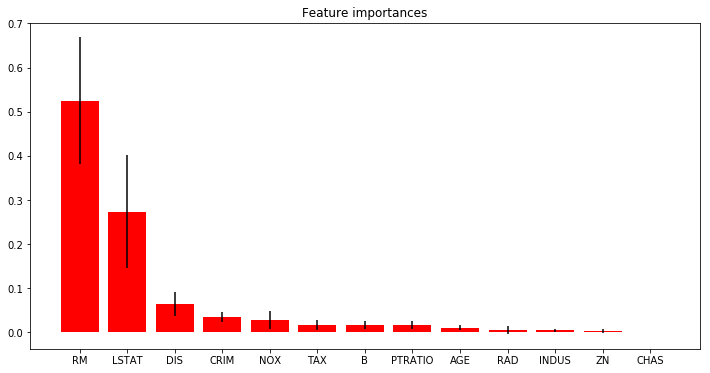

In [6]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

model = RandomForestRegressor(n_estimators=10,random_state=0, n_jobs= 10)
boston = load_boston()

df = pd.DataFrame(boston.data, columns=boston.feature_names) # load the dataset as a pandas data frame

# Train
model.fit(df, boston.target)
print ("score: %f" % model.score(df, boston.target))


bestScore={0:0}

for forest, tree in enumerate(model.estimators_):
    score = tree.score(df, boston.target)
    if score > list(bestScore.values())[0]:
        bestScore={forest:score}

print(bestScore)
# Extract single tree


treeSTD = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
importances = model.feature_importances_

indices = np.argsort(importances)[::-1]
totalFeatures = len(boston.data[0])


# Print the feature ranking
print("\nFeature ranking:")
for f in range(totalFeatures):
    print("%d. feature %s (%f)" % (f + 1, boston.feature_names[indices[f]], importances[indices[f]]))

    

# Plot the feature importances of the forest
fig = plt.figure(figsize=[12,6])
plt.title("Feature importances")
plt.bar(range(totalFeatures), importances[indices],
       color="r", yerr=treeSTD[indices], align="center")
plt.xticks(range(totalFeatures),  boston.feature_names[indices])
plt.show()
